<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:

!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

!pip install yfinance --upgrade --no-cache-dir


usage: mamba [-h] [--version] [--slow SLOW] [--enable-coverage]
             [--coverage-file COVERAGE_FILE] [--format FORMAT] [--no-color]
             [--tags TAGS]
             [specs ...]
mamba: error: unrecognized arguments: -y
  Using cached nbformat-4.2.0-py2.py3-none-any.whl (153 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.7.0
    Uninstalling nbformat-5.7.0:
      Successfully uninstalled nbformat-5.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
nbconvert 6.5.4 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.
nbclient 0.5.13 requires nbformat>=5.0, but you have nbformat 4.2.0 which is incompatible.
jupyter-server 1.23.4 requires nbformat>=5.2.0, but you have nbformat 4.2.0 which is incompatible.
conda-repo-cli 1.0.41

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [4]:
import yfinance as yf

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [5]:
tesla_share_price_data = tesla.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [6]:
tesla_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [7]:
url_rev = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

Parse the html data using `beautiful_soup`.


In [8]:
data  = requests.get(url_rev).text
print(data)

tesla_data  = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [9]:
tesla_data  = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [13]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the URL of the webpage containing the table
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table with "Tesla Revenue" using the "tbody" tag (index 1)
    table = soup.find_all("tbody")[1]

    # Initialize lists to store data
    dates = []
    revenues = []

    # Loop through rows and columns in the table
    for row in table.find_all("tr"):
        columns = row.find_all("td")
        if len(columns) == 2:
            date = columns[0].text
            revenue = columns[1].text
            dates.append(date)
            revenues.append(revenue)

    # Create a DataFrame from the extracted data
    tesla_revenue = pd.DataFrame({
        "Date": dates,
        "Revenue": revenues
    })
    tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
    tesla_revenue.dropna(inplace=True)
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
    # Print the first few rows of the DataFrame
    print(tesla_revenue.tail())

else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


          Date Revenue
48  2010-09-30     $31
49  2010-06-30     $28
50  2010-03-31     $21
52  2009-09-30     $46
53  2009-06-30     $27


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


Execute the following lines to remove an null or empty strings in the Revenue column.


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [16]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('[\$,]', '', regex=True)

print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [38]:
gme = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [65]:
gme_data = gme.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [66]:
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [67]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the URL of the webpage containing the table
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table with "Tesla Revenue" using the "tbody" tag (index 1)
    tableG = soup.find_all("tbody")[1]

    # Initialize lists to store data
    dates = []
    revenues = []

    # Loop through rows and columns in the table
    for row in tableG.find_all("tr"):
        columns = row.find_all("td")
        if len(columns) == 2:
            date = columns[0].text
            revenue = columns[1].text
            dates.append(date)
            revenues.append(revenue)

    # Create a DataFrame from the extracted data
    gme_revenue = pd.DataFrame({
        "Date": dates,
        "Revenue": revenues
    })
    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
    gme_revenue.dropna(inplace=True)
    gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
    # Print the first few rows of the DataFrame
    print(gme_revenue.tail())

else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [68]:
import requests

# Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the response content as html_data
    html_data = response.text
else:
    # If the request was not successful, print an error message
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

# Now, html_data contains the content of the webpage


Parse the html data using `beautiful_soup`.


In [69]:
soup = BeautifulSoup(html_data, 'html.parser')

# Example: Let's say you want to extract the title of the webpage
title = soup.title.string

# Print the title
print("Webpage Title:", title)

Webpage Title: GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [31]:
from bs4 import BeautifulSoup
import pandas as pd

# Create a BeautifulSoup object to parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with GameStop Revenue using the appropriate index
table = soup.find_all("tbody")[1]

# Initialize empty lists to store the data
dates = []
revenues = []

# Loop through the rows of the table
for row in table.find_all("tr"):
    # Extract the columns (cells) from each row
    columns = row.find_all("td")
    
    # Check if there are exactly two columns (Date and Revenue)
    if len(columns) == 2:
        date = columns[0].text.strip()  # Remove leading/trailing whitespace
        revenue = columns[1].text.strip().replace('$', '').replace(',', '')  # Remove $ and comma
        
        # Append the data to the respective lists
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Convert the 'Revenue' column to numeric
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# Print the first few rows of the DataFrame
print(gme_revenue.head())


         Date  Revenue
0  2020-04-30     1021
1  2020-01-31     2194
2  2019-10-31     1439
3  2019-07-31     1286
4  2019-04-30     1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [70]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


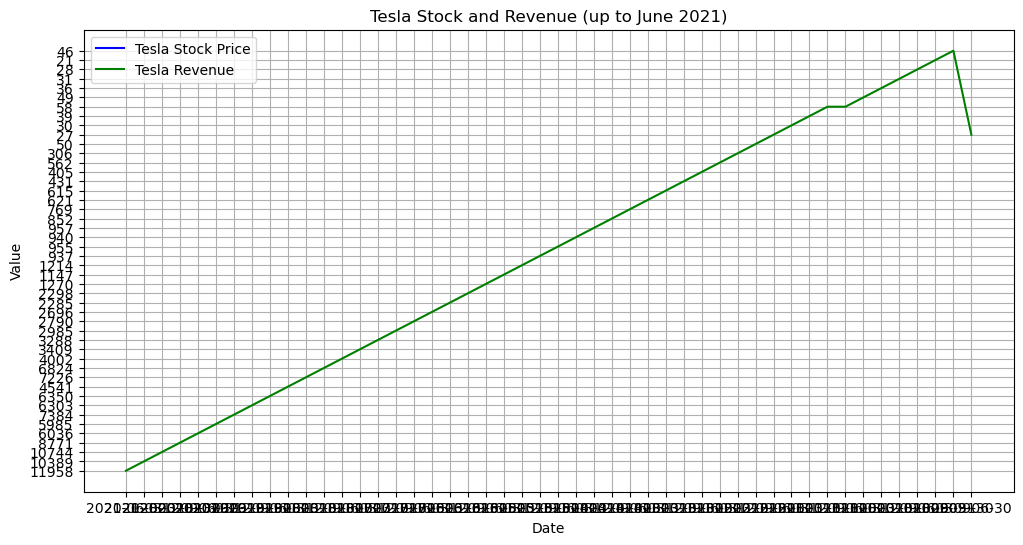

In [25]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    # Filter the data to include only data up to June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']

    # Create a plot
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Tesla Stock Price', color='blue')
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Tesla Revenue', color='green')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(title)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.grid()
    plt.show()

# Call the make_graph function with your data
make_graph(tesla_data, tesla_revenue, 'Tesla Stock and Revenue (up to June 2021)')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


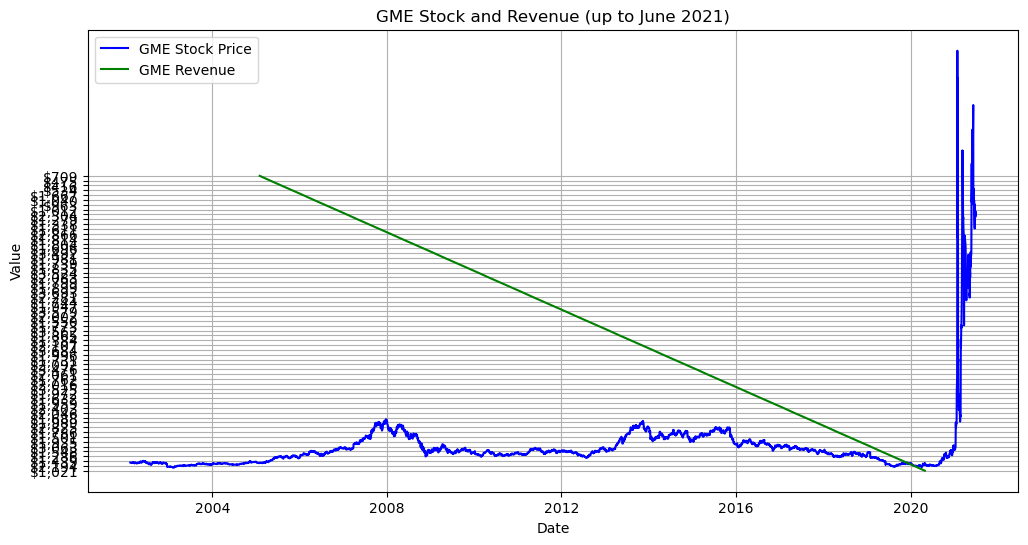

In [83]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    # Convert the date string to datetime for comparison
    cutoff_date = pd.to_datetime('2021-06-30').date()

    # Convert the index to a DatetimeIndex and extract the date component
    stock_data.index = pd.to_datetime(stock_data.index)
    stock_data['Date'] = stock_data.index.date

    # Filter the data to include only data up to June 2021
    stock_data = stock_data[stock_data['Date'] <= cutoff_date]

    # Convert the 'Date' column in revenue_data to datetime.date
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date']).dt.date
    revenue_data = revenue_data[revenue_data['Date'] <= cutoff_date]

    # Create a plot
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='GME Stock Price', color='blue')
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='GME Revenue', color='green')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(title)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.grid()
    plt.show()

# Call the make_graph function with your data
make_graph(gme_data, gme_revenue, 'GME Stock and Revenue (up to June 2021)')


In [75]:
print(gme_data.head())
print(gme_revenue.head())




                Open      High       Low     Close    Volume  Dividends  \
2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
2002-02-14  1.712708  1.716074  1.670626  1.683251  11021600        0.0   
2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600        0.0   
2002-02-19  1.666418  1.666418  1.578048  1.607504   7410400        0.0   
2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  
         Date Revenue
0  2020-04-30  $1,021
1  2020-01-31  $2,194
2  2019-10-31  $1,439
3  2019-07-31  $1,286
4  2019-04-30  $1,548


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
